In [1]:
import cv2 as cv
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os
os.chdir('../../data/ocr')

In [2]:
def show(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

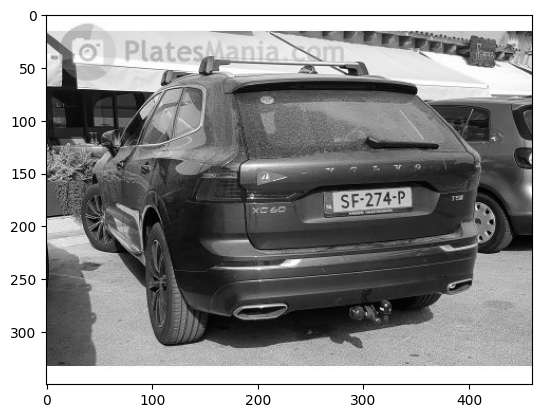

In [39]:
img = cv.imread('6.jpg')
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(grey)

### smothing image and sharp edges with bilateralfilter

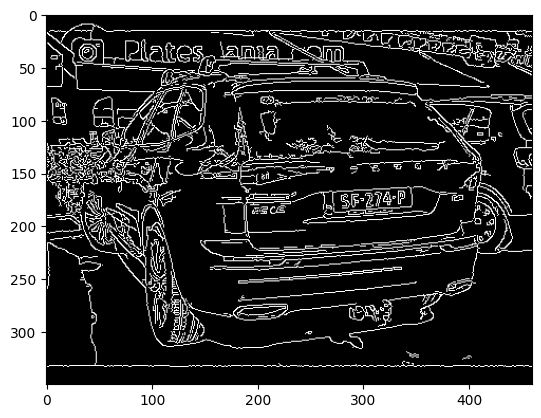

In [40]:
bfilter = cv.bilateralFilter(grey, 11, 17, 17)
edged_img = cv.Canny(bfilter, 30, 200)
show(edged_img)

In [41]:
#find contours
kpoints = cv.findContours(edged_img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(kpoints)
sortedContours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

In [42]:
location = None
for contour in contours:
    # approx to remove noise from contour
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [43]:
location

array([[[135, 280]],

       [[139, 306]],

       [[115, 309]],

       [[143, 307]]], dtype=int32)

In [44]:
location[1][0][1]

306

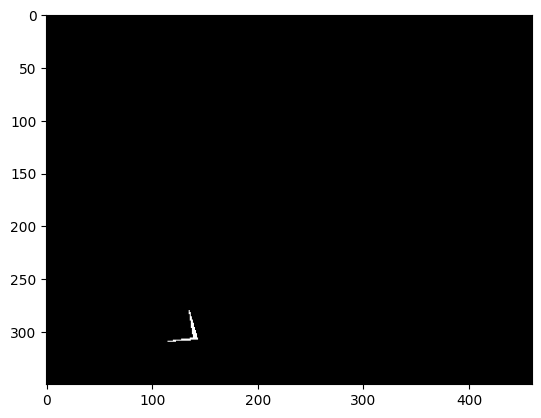

In [45]:
mask = np.zeros_like(grey, np.uint8)
new_image = cv.drawContours(mask, [location], -1, 255, -1)
show(new_image)